In [1]:
## general imports
import json
import numpy as np
import sys

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
## set paths
#dataDir  = '.'
#dataType = 'val2014'
#annType  = 'person_keypoints'
#teamName = 'fakekeypoints100'

#annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
#resFile  = '%s/detections/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)
annFile  = '../../data/mscoco2017/annotations/person_keypoints_val2017.json'
resFile  = 'vis_val2017_90000_vgginit_736_864/json_detection.json'
print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

# with open(annFile) as f:
#     gt_data = json.load(f)

# imgs_info = {i['id']:{'id':i['id'] ,
#                       'width':i['width'],
#                       'height':i['height']}
#                        for i in gt_data['images']}

annFile:  [../../data/mscoco2017/annotations/person_keypoints_val2017.json]
resFile:  [vis_val2017_90000_vgginit_736_864/json_detection.json]


In [3]:
# with open(resFile) as f:
#     team_dts = json.load(f)

# team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

# team_img_ids = set([d['image_id'] for d in team_dts])
# print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO(annFile)
catIds = coco_gt.getCatIds(catNms=['person'])
keys = coco_gt.getImgIds(catIds=catIds)
print('Person images: ', len(keys))

## initialize COCO detections api
coco_dt   = coco_gt.loadRes(resFile)

## initialize COCO eval api
cocoEval = COCOeval(coco_gt, coco_dt, 'keypoints')
cocoEval.params.imgIds = keys
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
# if teamName == 'fakekeypoints100':
#     imgIds  = sorted(coco_gt.getImgIds())[0:100]
#     coco_analyze.cocoEval.params.imgIds = imgIds

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Person images:  2693
Loading and preparing results...
DONE (t=0.36s)
creating index...
index created!
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=4.85s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.265
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.524
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.233
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.370
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.321
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.578
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=4.56s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.12s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.524
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.474
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.416
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.355
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.296
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.233
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.169
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.111
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.055
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

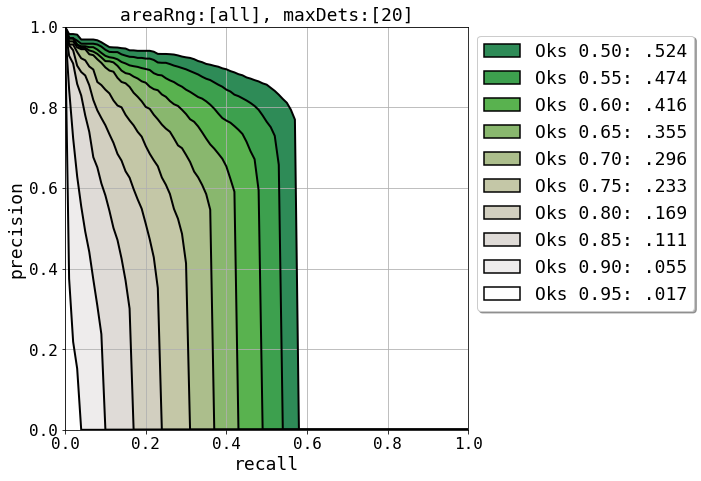

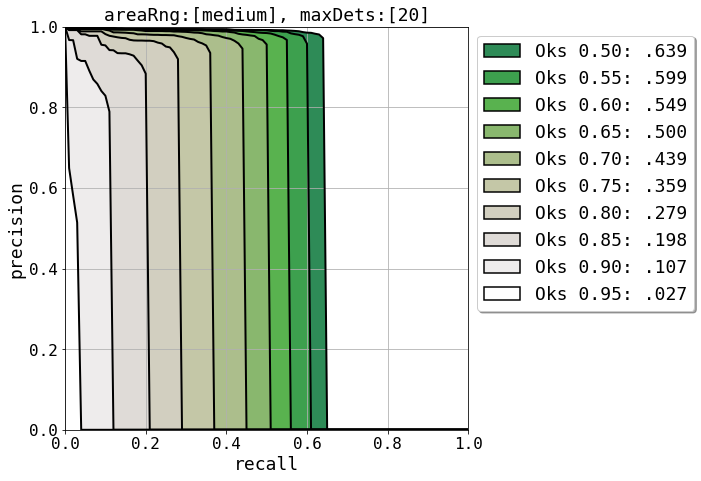

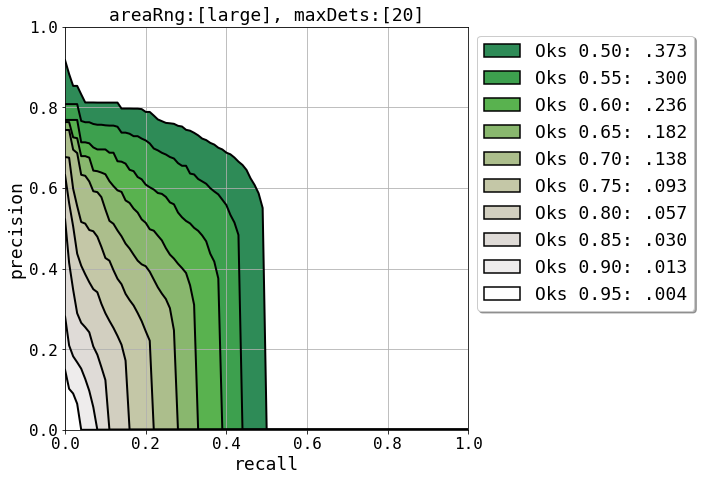

In [4]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
coco_analyze.evaluate(verbose=True, makeplots=True)

In [ ]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [ ]:
# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*


In [ ]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [ ]:
## print the performance summary 
for stat in coco_analyze.stats: print(stat)

In [ ]:
## after analyze() has been called the following variables are available

# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']

i = 17
# info on keypoint detection localization error
print('good: %s'%corrected_dts[i]['good'])
print('miss: %s'%corrected_dts[i]['miss'])
print('swap: %s'%corrected_dts[i]['swap'])
print('inv.: %s'%corrected_dts[i]['inversion'])
print('jit.: %s\n'%corrected_dts[i]['jitter'])

# corrected keypoint locations
print('predicted keypoints:\n %s'%corrected_dts[i]['keypoints'])
print('corrected keypoints:\n %s\n'%corrected_dts[i]['opt_keypoints'])

# optimal detection score
print('original score: %s'%corrected_dts[i]['score'])
print('optimal score:  %s\n'%corrected_dts[i]['opt_score'])

In [ ]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print("Oks:[%.2f] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts['all',str(oks)]),len(false_neg_gts['all',str(oks)])))